In [1]:
from fastquant import get_stock_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from gaussian_hmm_close import *
from simple_moving_average import *

In [2]:
f = open("tickers.txt", "r")
tickers = [s.strip('\n') for s in f.readlines()]

In [3]:
def test(ticker):
    try:
        print(ticker)
        # getting data
        training_data = get_stock_data(ticker,'2020-06-01','2021-01-01')
        testing_data = get_stock_data(ticker, '2021-01-01', '2021-05-11')
        openings = testing_data['open'].values
        # bulding model
        params = {'n_components': 2, 
          'algorithm': 'map', 
          'n_iter': 100, 
          'd': 5,
          'name':'GHMM'}
        ghmm = GHMM(params=params)

        sma_params = {'d': 3, 'name': 'SMA-3'}
        sma = SMA(params=sma_params)

        # train pred
        ghmm.train(training_data)
        preds,actual = ghmm.predict(testing_data)

        sma.train(training_data)
        preds_sma, actual_sma = sma.predict(testing_data)

        # MAPE
        error = ghmm.mean_abs_percent_error(preds,actual)
        print(f'ghmm error: {error}')

        sma_error = sma.mean_abs_percent_error(preds_sma, actual_sma)
        print(f'sma error: {sma_error}')

        # acc error
        preds_df = pd.DataFrame(preds)
        actual_df = pd.DataFrame(actual)
        pred_change = preds_df.pct_change()
        actual_change = actual_df.pct_change()
        pred_change = list(pred_change.iloc[1:].values.flatten())
        actual_change = list(actual_change.iloc[1:].values.flatten())
        pred_change = list(map(lambda n: n>0, pred_change))
        actual_change = list(map(lambda n: n>0, actual_change))
        acc = [x == y for x,y in zip(pred_change,actual_change)]
        acc = sum(acc)/len(acc)
        print(f'GHMM Trend accuracy: {acc}')

        preds_df = pd.DataFrame(preds_sma)
        actual_df = pd.DataFrame(actual_sma)
        pred_change = preds_df.pct_change()
        actual_change = actual_df.pct_change()
        pred_change = list(pred_change.iloc[1:].values.flatten())
        actual_change = list(actual_change.iloc[1:].values.flatten())
        pred_change = list(map(lambda n: n>0, pred_change))
        actual_change = list(map(lambda n: n>0, actual_change))
        acc = [x == y for x,y in zip(pred_change,actual_change)]
        acc = sum(acc)/len(acc)
        print(f'SMA Trend accuracy: {acc}')

        # graphing
        fig, ax = plt.subplots(figsize=(15,5))
        ax.set_title(ticker)
        time = range(len(preds))
        ax.plot(time,preds,color='tab:red',marker='s',markersize=2,linestyle='-',linewidth=1,label='ghmm')
        ax.plot(time,actual,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
        ax.set_xlabel('time')
        ax.set_ylabel('stock price ($)')
        ax.set_xticks(np.arange(0,len(preds)+10,10))
        ax.set_xlim(0,len(preds)+10)
        ax.xaxis.grid(True,ls='--')
        ax.yaxis.grid(True,ls='--')
        ax.legend()
        plt.show()

        fig, ax = plt.subplots(figsize=(15,5))
        ax.set_title(ticker)
        time = range(len(ghmm.train_obs))
        ax.plot(time,ghmm.train_obs,color='tab:red',marker='s',markersize=2,linestyle='-',linewidth=1,label='train_data')
        #ax.plot(time,actual,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
        ax.set_xlabel('time')
        ax.set_ylabel('stock price ($)')
        ax.set_xticks(np.arange(0,len(ghmm.train_obs)+10,10))
        ax.set_xlim(0,len(ghmm.train_obs)+10)
        ax.xaxis.grid(True,ls='--')
        ax.yaxis.grid(True,ls='--')
        ax.legend()
        plt.show()
    except:
        print('ticker not old enough')

In [4]:
#for ticker in tickers:
#    test(ticker)

In [5]:
#test('GME')

SPY
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DONE9
DONE8
ghmm error: 13885.793770762572
sma error: 0.8169691264265883
GHMM Trend accuracy: 0.735632183908046
SMA Trend accuracy: 0.4942528735632184


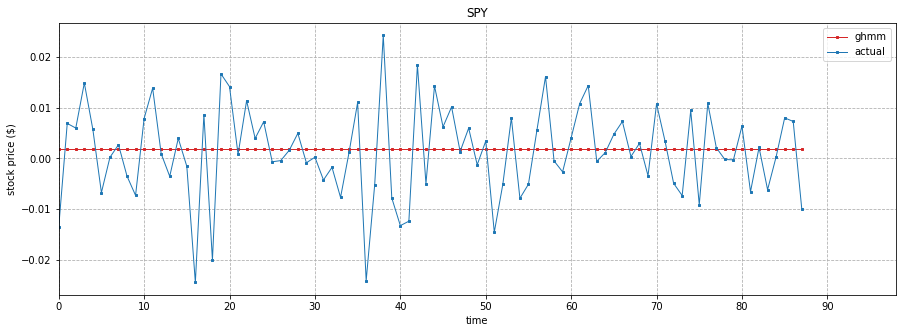

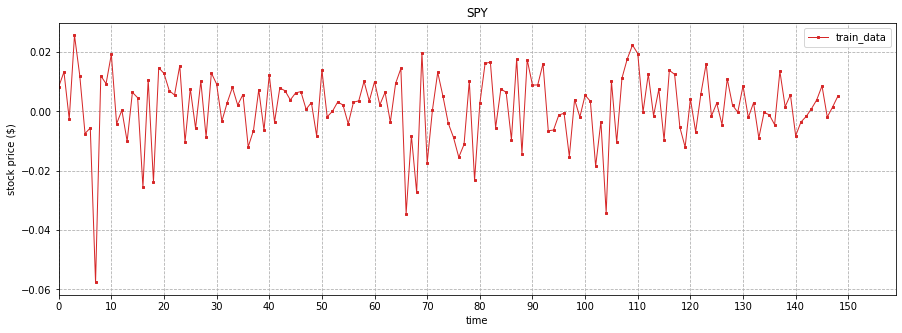

In [6]:
test('SPY')